# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df_raw = pd.read_csv("C:/Users/ojime/OneDrive/Documents/breakexp2020.csv")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3359 non-null   int64  
 1   Time           3359 non-null   int64  
 2   Doc_No         3359 non-null   int64  
 3   Seq_No         3359 non-null   int64  
 4   Tray_No        3359 non-null   int64  
 5   Oper_Num       3359 non-null   int64  
 6   Oper_Name      3359 non-null   object 
 7   Dept_Num       3359 non-null   int64  
 8   Dept_Name      3359 non-null   object 
 9   Machine_Num    3359 non-null   int64  
 10  Machine_Name   3359 non-null   object 
 11  Reas_Num       3359 non-null   int64  
 12  Reas_Name      3359 non-null   object 
 13  Eye_Broken     3359 non-null   int64  
 14  Oper_Machine   3359 non-null   object 
 15  Vendor         3359 non-null   int64  
 16  Vendor Name    3359 non-null   object 
 17  Material       3359 non-null   int64  
 18  Material

In [4]:
df_raw['Reas_Name'].nunique()

132

# **Cleaning**

In [5]:
df_raw.head()

,Date,Time,Doc_No,Seq_No,Tray_No,Oper_Num,Oper_Name,Dept_Num,Dept_Name,Machine_Num,...,Frame_A,Frame_B,Frame_ED,Frame_DBL,Frame_Price,Frame_Cost,Cust_Code,Error_Type,User,Cost_Extra
0,20200102,9063064,1097167,0,4695,4,Jose Tapia,5,ALL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,103,I,CN,0.0
1,20200102,9064601,1097622,0,4752,4,Jose Tapia,5,ALL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,123,I,CN,0.0
2,20200102,9085417,1097622,1,4752,4,Jose Tapia,5,ALL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,123,I,CN,0.0
3,20200102,9095682,1097535,0,4436,4,Jose Tapia,5,ALL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,133,I,CN,0.0
4,20200102,9095682,1097535,1,4436,4,Jose Tapia,5,ALL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,133,I,CN,0.0


In [6]:
df_raw.tail()

,Date,Time,Doc_No,Seq_No,Tray_No,Oper_Num,Oper_Name,Dept_Num,Dept_Name,Machine_Num,...,Frame_A,Frame_B,Frame_ED,Frame_DBL,Frame_Price,Frame_Cost,Cust_Code,Error_Type,User,Cost_Extra
3354,20201224,7595094,1141326,0,2306,5,ADAM WOOSLEY,5,ALL,3,...,0.0,0.0,0.0,0.0,0.0,0.0,117,I,AW,0.0
3355,20201224,8004255,1142598,0,1535,5,ADAM WOOSLEY,5,ALL,28,...,0.0,0.0,0.0,0.0,0.0,0.0,152,I,AW,0.0
3356,20201224,8011425,1142616,0,1035,5,ADAM WOOSLEY,5,ALL,12,...,0.0,0.0,0.0,0.0,0.0,0.0,152,I,AW,0.0
3357,20201224,10263572,1140508,0,1899,2,JULIO NOVOA,5,ALL,14,...,0.0,0.0,0.0,0.0,0.0,0.0,108,I,AW,0.0
3358,20201224,10542574,1141599,0,6879,2,JULIO NOVOA,5,ALL,12,...,0.0,0.0,0.0,0.0,0.0,0.0,101,I,AW,0.0


**As we can see, this dataset is very messy and has many unused, repeated, or irrelevant columns; therefore, we will drop these unnecessary columns to have a cleaner workspace.**

In [7]:
df = df_raw.drop(['Doc_No', 'Dept_Name', 'Dept_Num','Seq_No', 'Tray_No', 'Vendor', 'Vendor Name', 'Material', 'LensType', 'Color','BC', 'AddPower', 'Sphere',
         'Cylinder', 'Blank', 'Frame_SKU', 'Frame_A', 'Frame_B','Frame_ED', 'Frame_DBL', 'Cust_Code', 'Error_Type','Lens_Price','Frame_Price', 'Frame_Cost', 
'Cost_Extra'], axis=1)

**The result is a much cleaner dataset.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3359 non-null   int64  
 1   Time           3359 non-null   int64  
 2   Oper_Num       3359 non-null   int64  
 3   Oper_Name      3359 non-null   object 
 4   Machine_Num    3359 non-null   int64  
 5   Machine_Name   3359 non-null   object 
 6   Reas_Num       3359 non-null   int64  
 7   Reas_Name      3359 non-null   object 
 8   Eye_Broken     3359 non-null   int64  
 9   Oper_Machine   3359 non-null   object 
 10  Material Desc  3359 non-null   object 
 11  LensType Desc  3359 non-null   object 
 12  Color Desc     3359 non-null   object 
 13  Lens_Cost      3359 non-null   float64
 14  User           3359 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 393.8+ KB


In [9]:
df.head()

,Date,Time,Oper_Num,Oper_Name,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User
0,20200102,9063064,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,2,M,PL,CUSTOM-U,FACTORY,29.50,CN
1,20200102,9064601,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,1,M,POLY,S,HARDCOAT,4.42,CN
2,20200102,9085417,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,1,M,POLY,S,HARDCOAT,4.42,CN
3,20200102,9095682,4,Jose Tapia,4,CUSTOM EYES,481,RECEIVED WITH PITS,1,M,PL,CUSTOM-U,FACTORY,29.50,CN
4,20200102,9095682,4,Jose Tapia,4,CUSTOM EYES,481,RECEIVED WITH PITS,2,M,PL,CUSTOM-U,FACTORY,29.50,CN


In [10]:
df.tail()

,Date,Time,Oper_Num,Oper_Name,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User
3354,20201224,7595094,5,ADAM WOOSLEY,3,ORBIT GEN,548,TOO THIN,1,M,TRIVEX,CUSTOM-U,TRANS,7.50,AW
3355,20201224,8004255,5,ADAM WOOSLEY,28,ASSEMBLY,541,SCRATCHED LENS,1,M,CR-39,S,CLEAR,2.76,AW
3356,20201224,8011425,5,ADAM WOOSLEY,12,finished edgers,225,A/R coating Craze,1,M,CR-39,S,CLEAR,2.76,AW
3357,20201224,10263572,2,JULIO NOVOA,14,poly coater,67,DRIP on lens,1,M,TRIVEX,CUSTOM-U,FACTORY,20.76,AW
3358,20201224,10542574,2,JULIO NOVOA,12,finished edgers,64,edger malfunction,2,M,POLY,S,HARDCOAT,4.42,AW


**Let's check for any null values in the dataset.**

In [11]:
df.isnull().values.any()

False

# **Exploratory analysis: Breakage reason and origin**

**Since our focus is breakages, we will look at the machines with the most breakages and the reasons for most breakages.**

In [12]:
df['Machine_Name'].value_counts().head()

CUSTOM EYES        1203
poly coater         444
DC                433
finished edgers     420
ORBIT GEN           376
Name: Machine_Name, dtype: int64

In [13]:
df['Machine_Name'].nunique()

17

In [14]:
df['Reas_Name'].value_counts().head()

RECEIVED WITH SCRTCH    532
BLOWN RUN BKGE          300
pits                    215
A/R lab lost lens       209
Scratched lens          147
Name: Reas_Name, dtype: int64

In [15]:
df['Reas_Name'].nunique()

132

**For a better presentation, use Seaborn to create visuals of "Machine_Name" and "Reas_Name" data.**

<AxesSubplot:xlabel='count', ylabel='Machine_Name'>

C:\Users\ojime\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


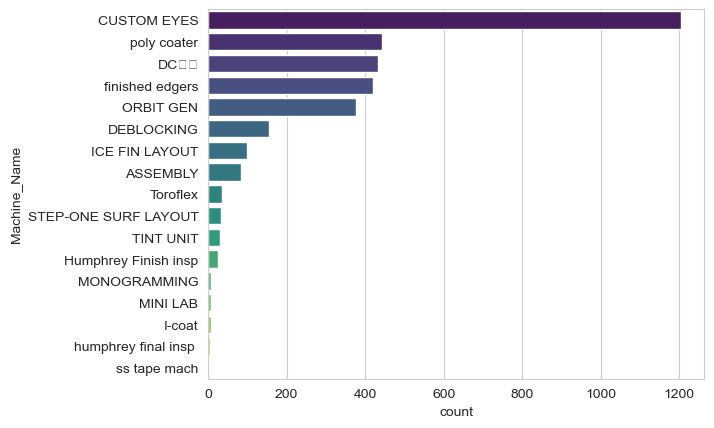

In [16]:
sns.countplot(y="Machine_Name", data=df, order=df.Machine_Name.value_counts().iloc[:].index, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Reas_Name'>

C:\Users\ojime\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


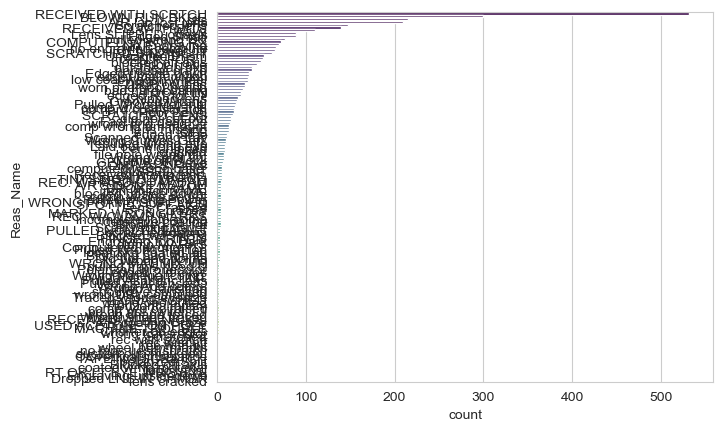

In [17]:
sns.countplot(y="Reas_Name", data=df, order=df.Reas_Name.value_counts().iloc[:].index, palette='viridis')

**As we can see, the "Reas_name" graph above is extremely messy. Therefore, only breakage reasons with significant occurrences will be displayed.**

In [18]:
df['Reas_Name'].value_counts().head(16)

RECEIVED WITH SCRTCH    532
BLOWN RUN BKGE          300
pits                    215
A/R lab lost lens       209
Scratched lens          147
RECEIVED WITH PITS      140
Wavy                    110
Lens SLIPPED offaxis     89
Edged Small              89
pulled wrong BC          76
COMPUTED WRONG RX        72
No Engraving             70
no engraving compute     66
GEN.power off            65
SCRATCHED SINZING IT     62
Unwanted Prism           53
Name: Reas_Name, dtype: int64

**By looking at the value count for each reason, we can set a threshold on a specific number; in this case, we will set it at 50 
which is roughly 10% of the highest value count. Now we can plot a graph that will show all the reason occurrences 50 and above**

<AxesSubplot:xlabel='count', ylabel='Reas_Name'>

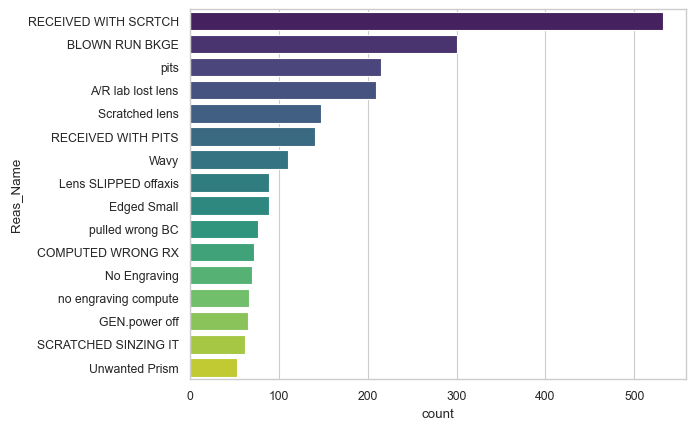

In [45]:
sns.countplot(y="Reas_Name", data=df, order=df.Reas_Name.value_counts().iloc[:16].index,palette='viridis')

# **Exploratory analysis: Categories**

**After the previous visualization, we found that the Machine/Department 'CUSTOM EYES' has the highest breakage count. Next, we will define each category's variables in the plot.**

In [46]:
CE = df[df['Machine_Name'] == 'CUSTOM EYES']['Reas_Name']
PC = df[df['Machine_Name'] == 'poly coater']['Reas_Name']
DCC = df[df['Machine_Name'] == 'DC']['Reas_Name']
FE = df[df['Machine_Name'] == 'finished edgers']['Reas_Name']
OG = df[df['Machine_Name'] == 'ORBIT GEN']['Reas_Name']

**We plot each of the newly created variables.**

Text(0.5, 1.0, 'CUSTOM EYES')

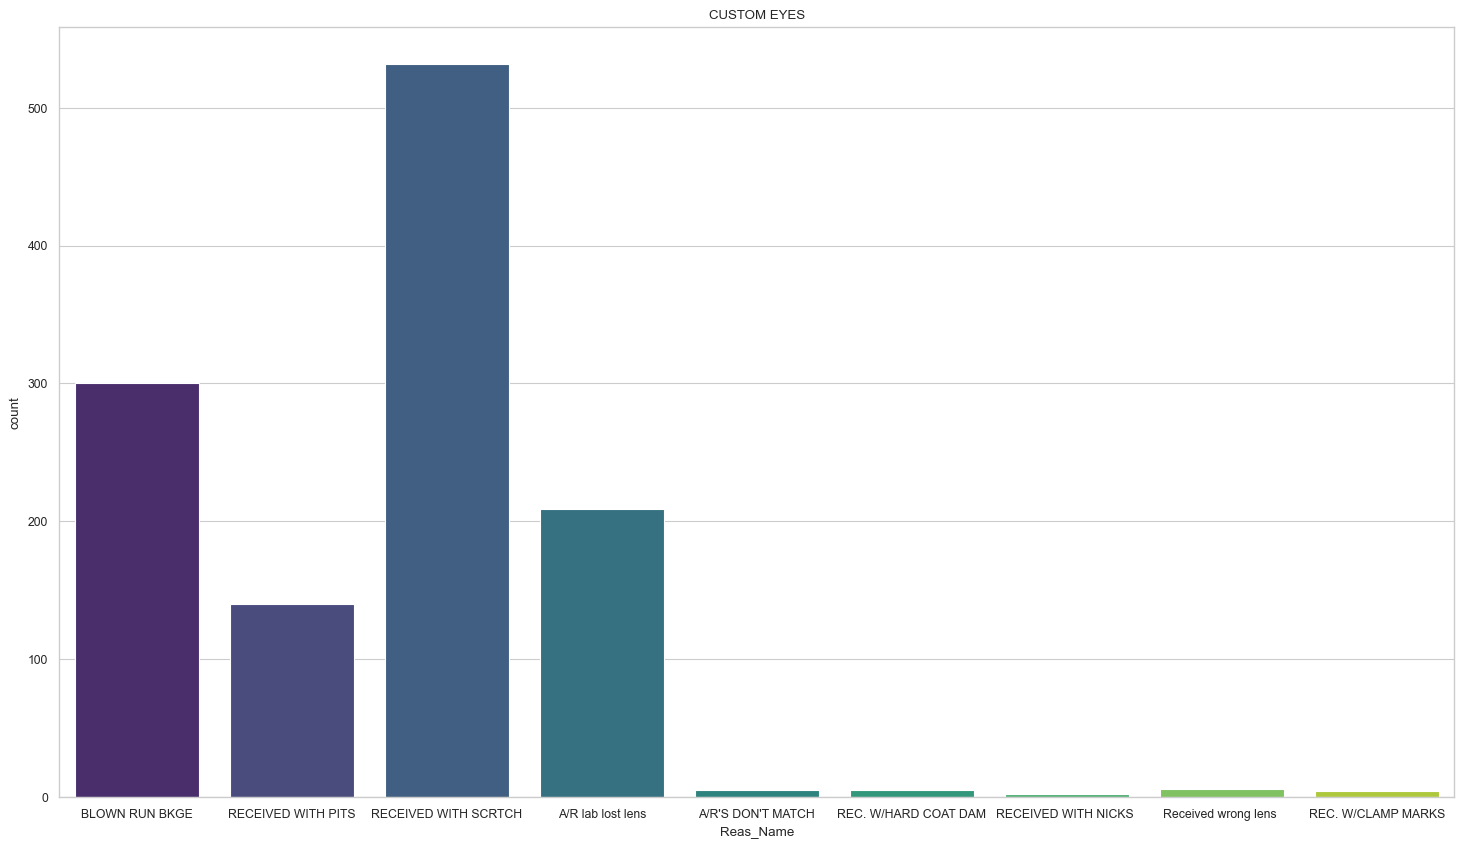

In [47]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(x=CE,data=df,palette='viridis')
plt.title('CUSTOM EYES')

Text(0.5, 1.0, 'Poly Coater')

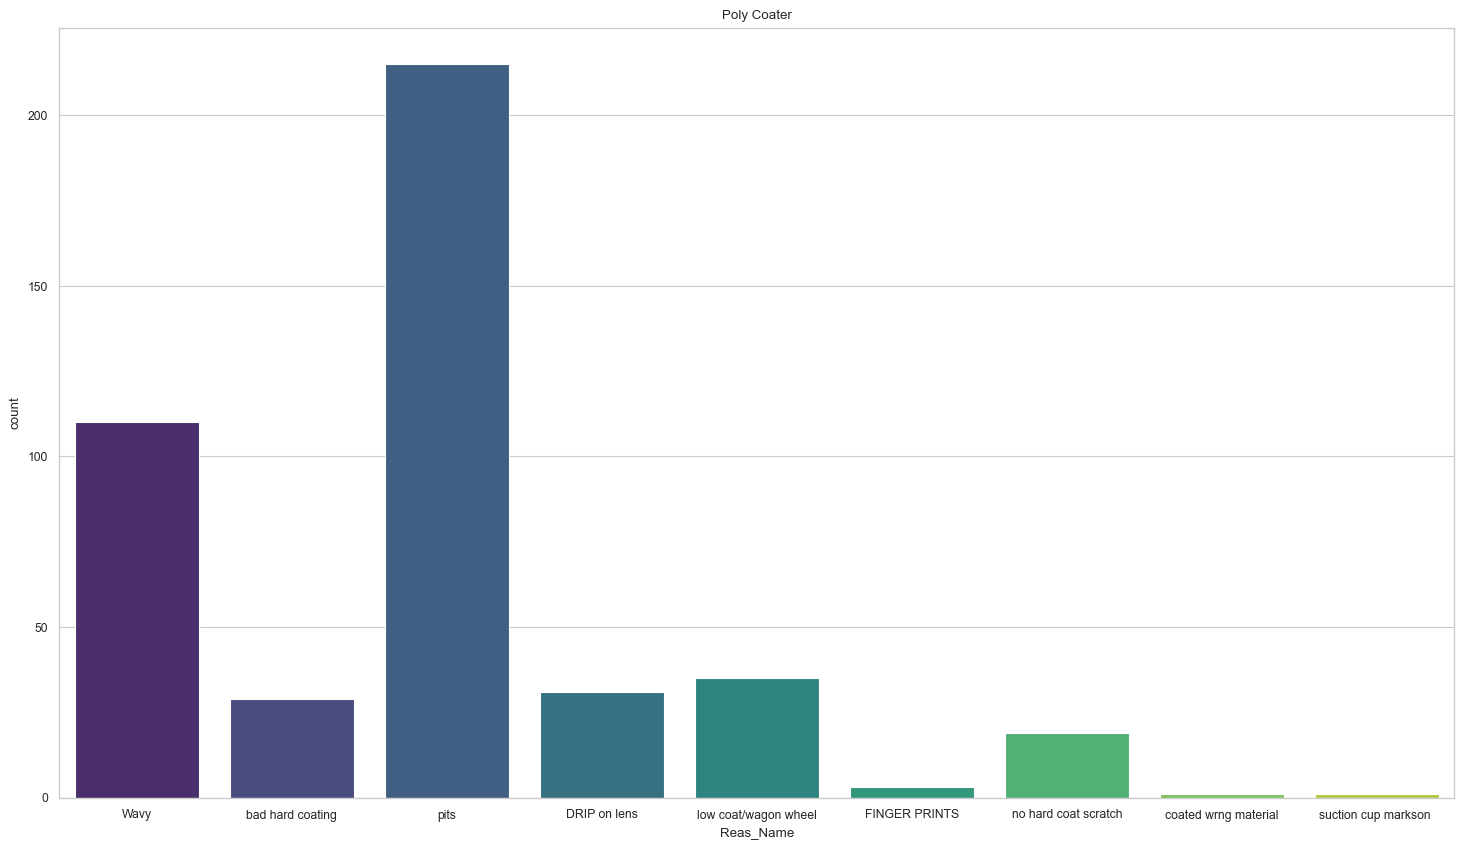

In [48]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(x=PC,data=df,palette='viridis')
plt.title('Poly Coater')

Text(0.5, 1.0, 'DC\x7f\x7f')

C:\Users\ojime\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


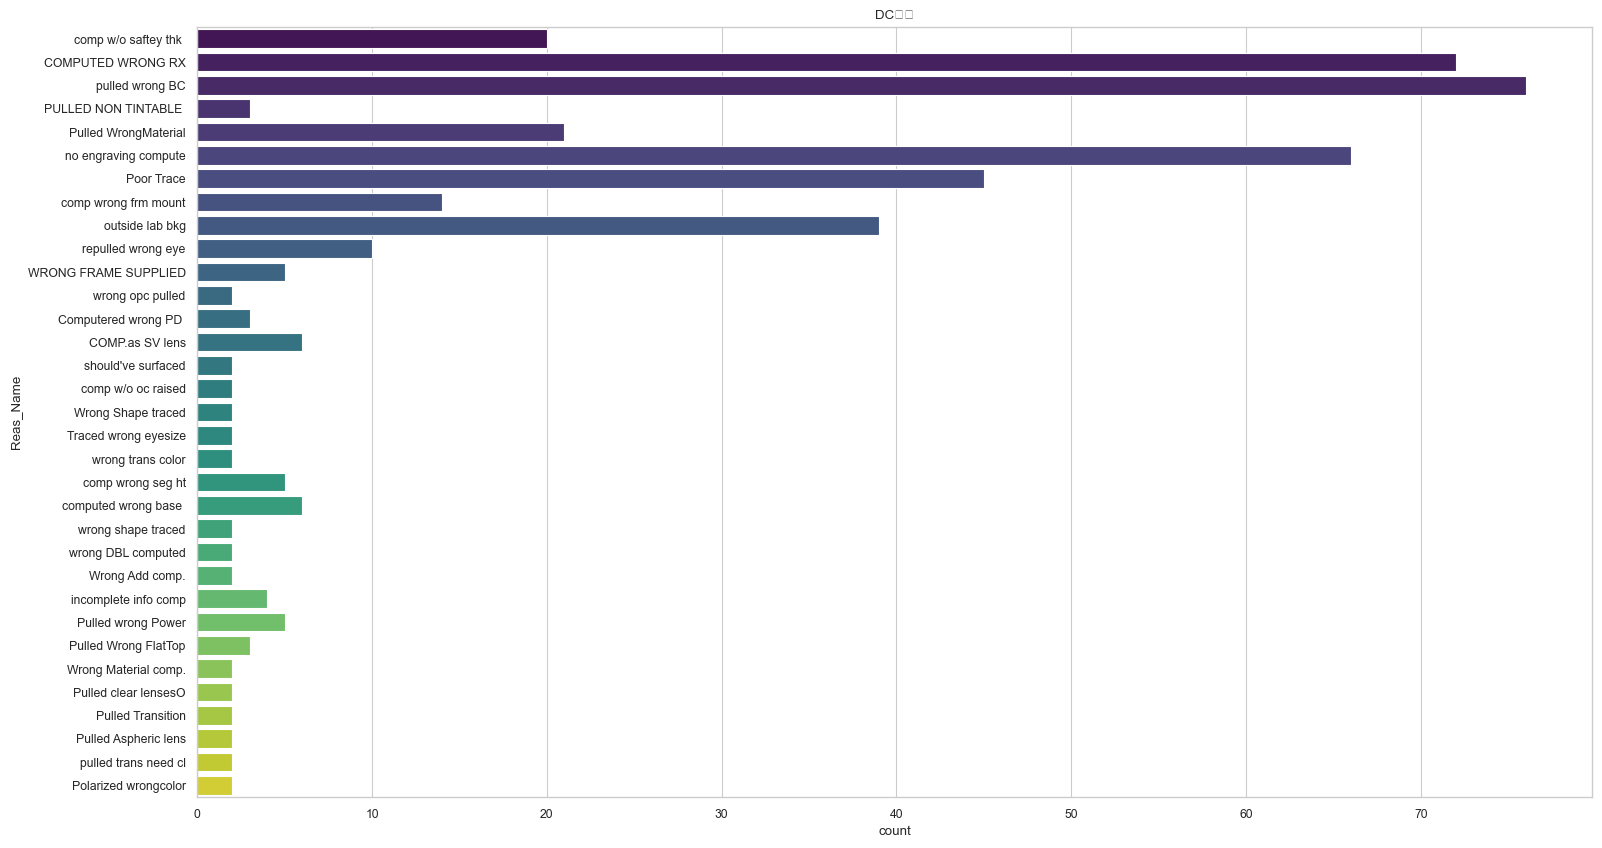

In [49]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=DCC,data=df,palette='viridis')
plt.title('DC')

Text(0.5, 1.0, 'finished edgers')

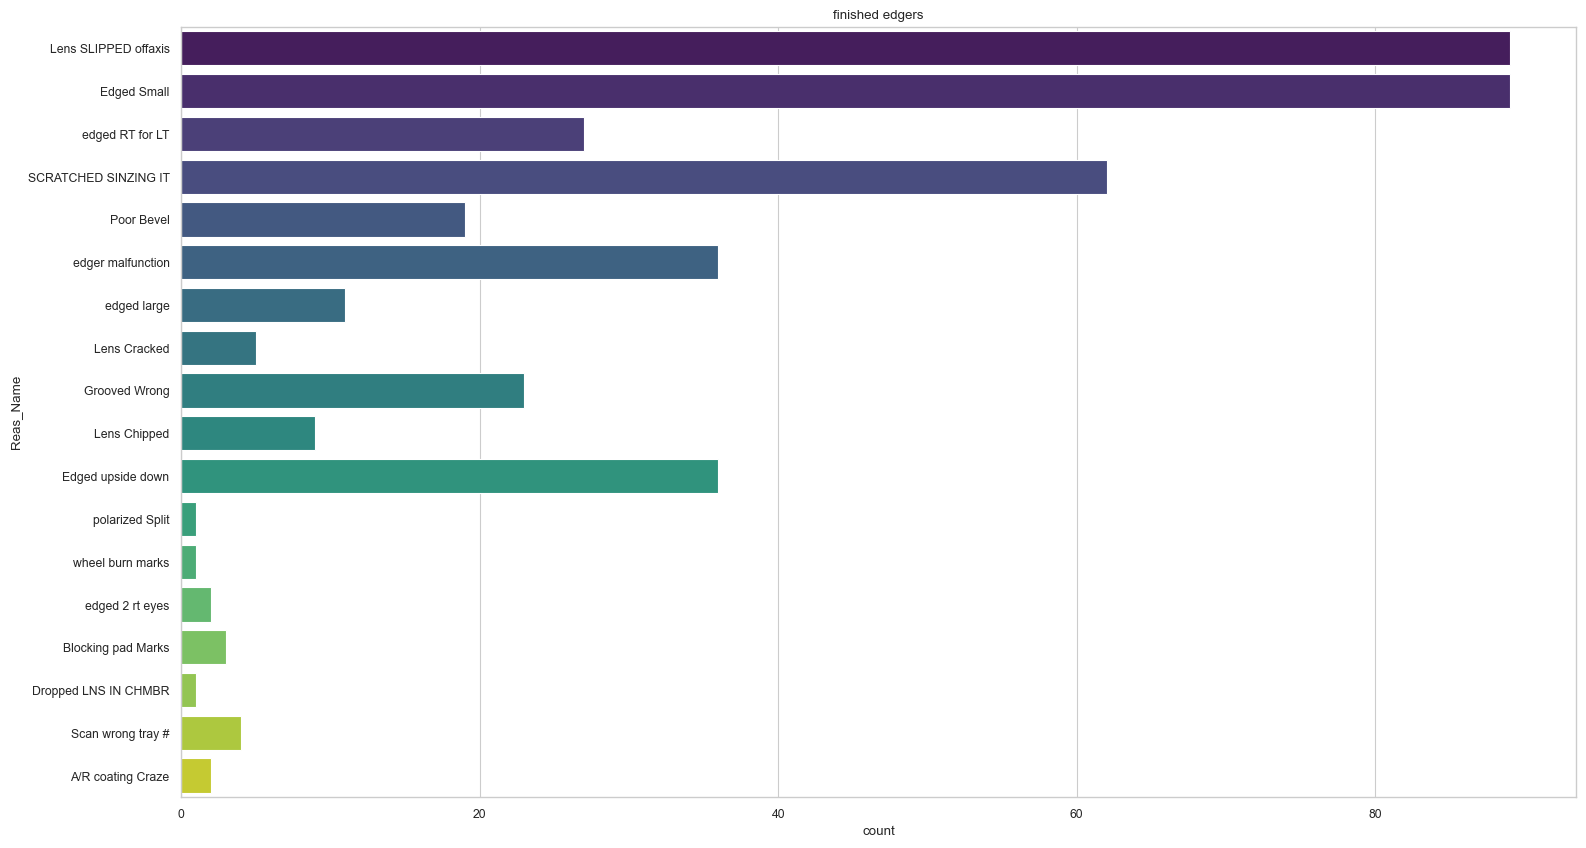

In [50]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=FE,data=df,palette='viridis')
plt.title('finished edgers')

Text(0.5, 1.0, 'ORBIT GEN')

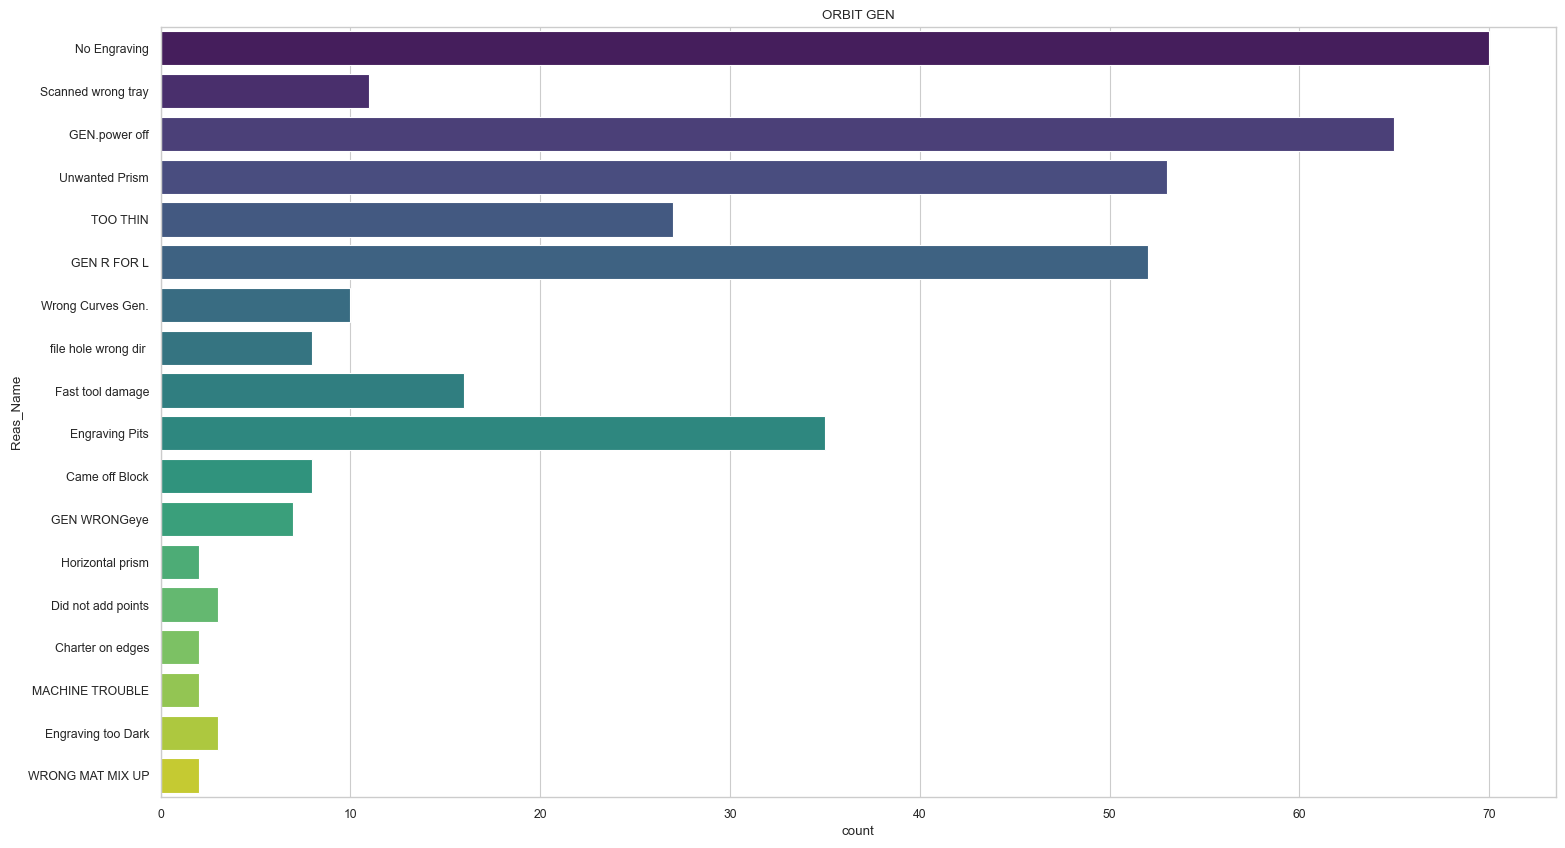

In [51]:
sns.set_context('paper',font_scale=1)
plt.figure(figsize=(18,10))
sns.countplot(y=OG,data=df,palette='viridis')
plt.title('ORBIT GEN')

# **Exploratory analysis: Time**

**After finding the reason and origin for most breakages, we can focus on the time data regarding breakages.**

**To start, we check the data type of the 'Date' column and change it to Datetime if needed.**

In [52]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,Date,Time,Oper_Num,Oper_Name,Machine_Num,Machine_Name,Reas_Num,Reas_Name,Eye_Broken,Oper_Machine,Material Desc,LensType Desc,Color Desc,Lens_Cost,User,Hour,Month,Day of Week,Year-Month
0,2020-01-02,9063064,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,2,M,PL,CUSTOM-U,FACTORY,29.50,CN,0,1,Thu,2020-01-02
1,2020-01-02,9064601,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,1,M,POLY,S,HARDCOAT,4.42,CN,0,1,Thu,2020-01-02
2,2020-01-02,9085417,4,Jose Tapia,4,CUSTOM EYES,483,BLOWN RUN BKGE,1,M,POLY,S,HARDCOAT,4.42,CN,0,1,Thu,2020-01-02
3,2020-01-02,9095682,4,Jose Tapia,4,CUSTOM EYES,481,RECEIVED WITH PITS,1,M,PL,CUSTOM-U,FACTORY,29.50,CN,0,1,Thu,2020-01-02
4,2020-01-02,9095682,4,Jose Tapia,4,CUSTOM EYES,481,RECEIVED WITH PITS,2,M,PL,CUSTOM-U,FACTORY,29.50,CN,0,1,Thu,2020-01-02


In [54]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Let's create variables for day, month, and hour data.**

In [55]:
df['Hour'] = df['Date'].apply(lambda time: time.hour)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)

In [56]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**For a better reading, let's create a dictionary to change numeric values to day names.**

In [57]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [58]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**We check the number of breakages for each month and day.**

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

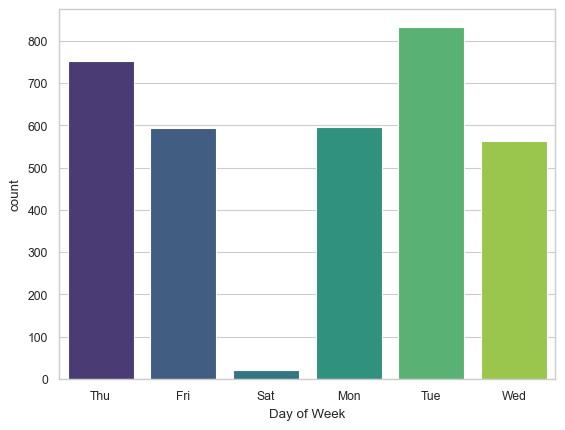

In [59]:
sns.countplot(x='Day of Week',data=df, palette='viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

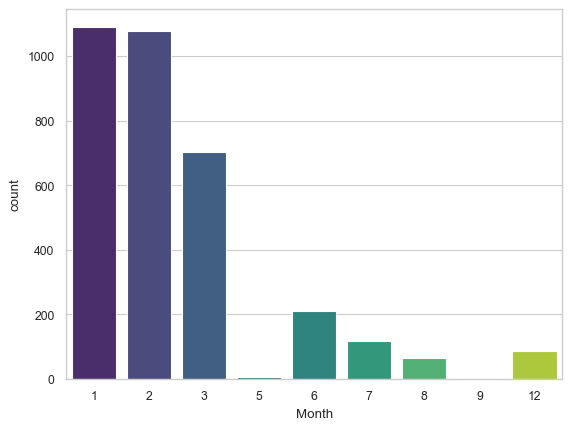

In [60]:
sns.countplot(x='Month',data=df, palette='viridis')

**Since we are missing a couple of months, we should use another form of visualization for better readability.**

In [61]:
byMonth = df.groupby('Month').count()

**This plot shows the amount breakages per month.**

<AxesSubplot:xlabel='Month'>

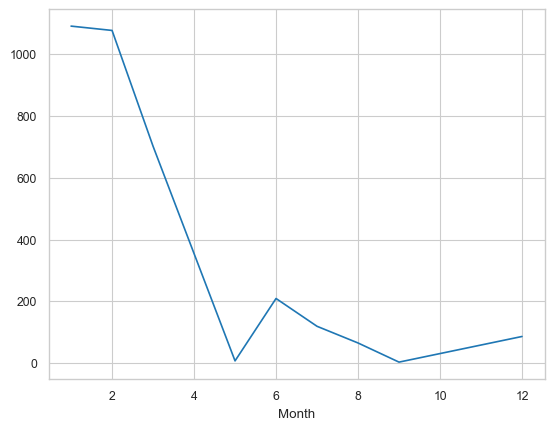

In [62]:
byMonth['User'].plot()

**Let's use a linear regression plot to see if there are any outliers or detect any unusual observations.**

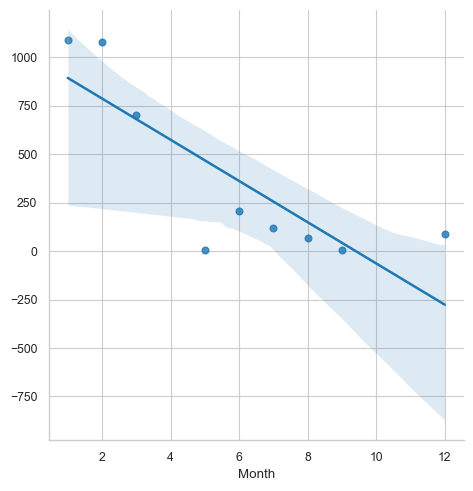

In [63]:
sns.lmplot(x='Month',y='User',data=byMonth.reset_index()).set(ylabel = '')

**As we can see above, for the most part, the values stay within the line except around May.**

**Let's create a column based on the breakage occurrences of every month of the year and use it to explore the top breakage origin and also the reasons for most breakage occurrences in general.**

In [64]:
df['Year-Month']=df['Date'].apply(lambda t: t.date())

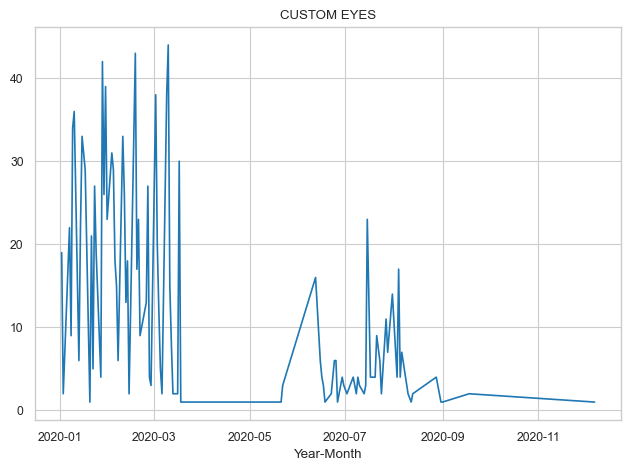

In [65]:
df[df['Machine_Name']=='CUSTOM EYES'].groupby('Year-Month').count()['User'].plot()
plt.title('CUSTOM EYES')
plt.tight_layout()

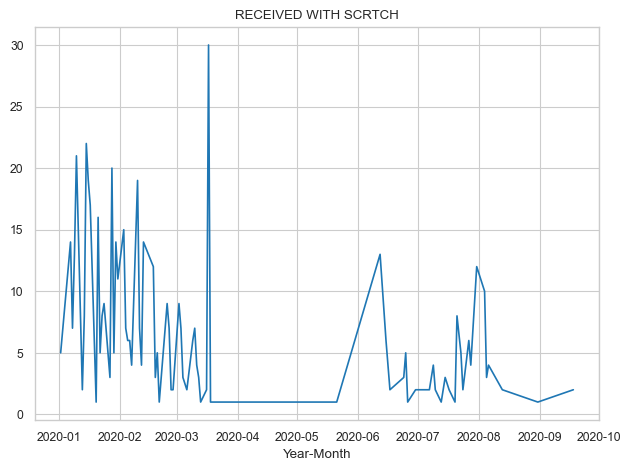

In [66]:
df[df['Reas_Name']=='RECEIVED WITH SCRTCH'].groupby('Year-Month').count()['User'].plot()
plt.title('RECEIVED WITH SCRTCH')
plt.tight_layout()

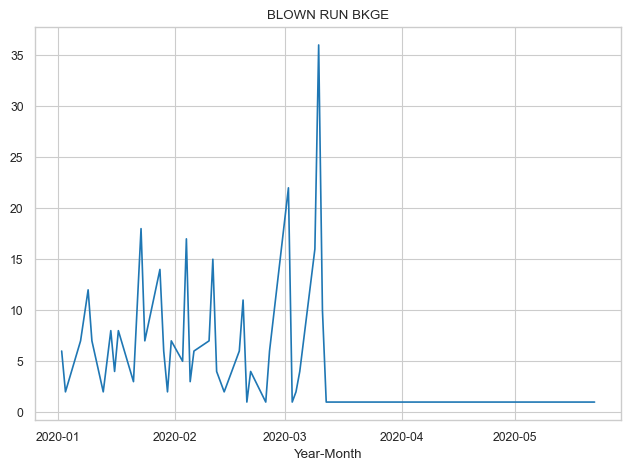

In [67]:
df[df['Reas_Name']=='BLOWN RUN BKGE'].groupby('Year-Month').count()['User'].plot()
plt.title('BLOWN RUN BKGE')
plt.tight_layout()


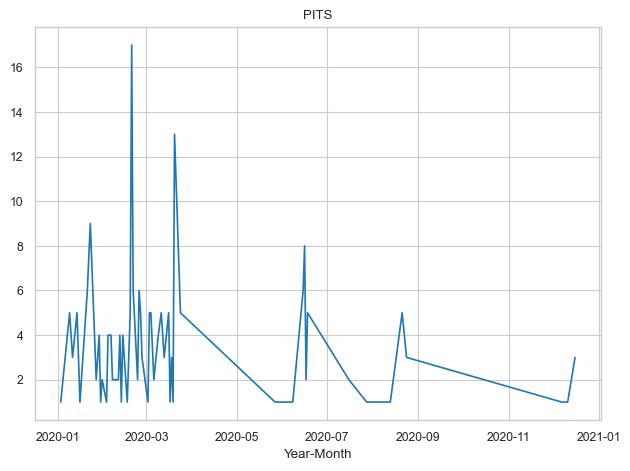

In [68]:
df[df['Reas_Name']=='pits'].groupby('Year-Month').count()['User'].plot()
plt.title('PITS')
plt.tight_layout()

**Let's downsize by restructuring the data to examine the number of breakages every day of the week for each month and plot it using a heatmap for a clear presentation.**

In [69]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['User'].unstack()
dayMonth.head()

Month,1,2,3,5,6,7,8,9,12
Day of Week,,,,,,,,,
Fri,266.0,150.0,105.0,3.0,20.0,23.0,16.0,2.0,9.0
Mon,92.0,211.0,174.0,NaN,55.0,23.0,12.0,NaN,30.0
Sat,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thu,305.0,273.0,96.0,1.0,27.0,22.0,15.0,NaN,13.0
Tue,261.0,240.0,204.0,NaN,80.0,25.0,17.0,1.0,5.0


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

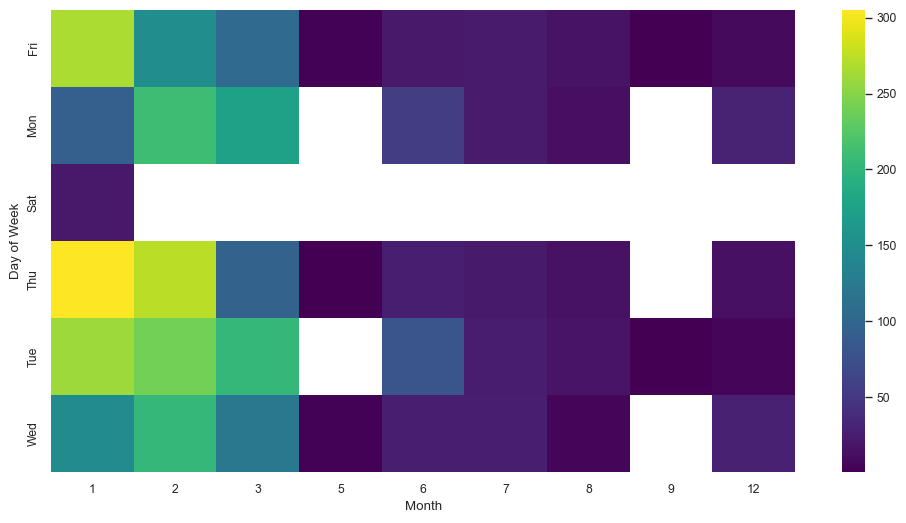

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')